<a href="https://colab.research.google.com/github/wiltonssa/Python_Investimentos/blob/main/03_CORRELA%C3%87%C3%83O_entre_D%C3%93LAR_e_IBOVESPA_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos


**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

**Canal no Youtube:** https://www.youtube.com/ricospeloacaso?sub_confirmation=1

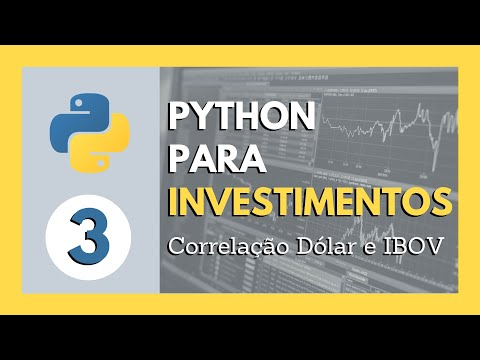

In [ ]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('zjaGIcUb6Ek', width=854, height=480)

# 1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [ ]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
...,...,...
2020-05-13,5.8848,77772.0
2020-05-14,5.8864,79011.0
2020-05-15,5.8094,77557.0


In [ ]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-05-12,5.8171,77872.0
2020-05-13,5.8848,77772.0
2020-05-14,5.8864,79011.0


In [ ]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-05-12,5.8171,77872.0
2020-05-13,5.8848,77772.0
2020-05-14,5.8864,79011.0


# 3. Resultados

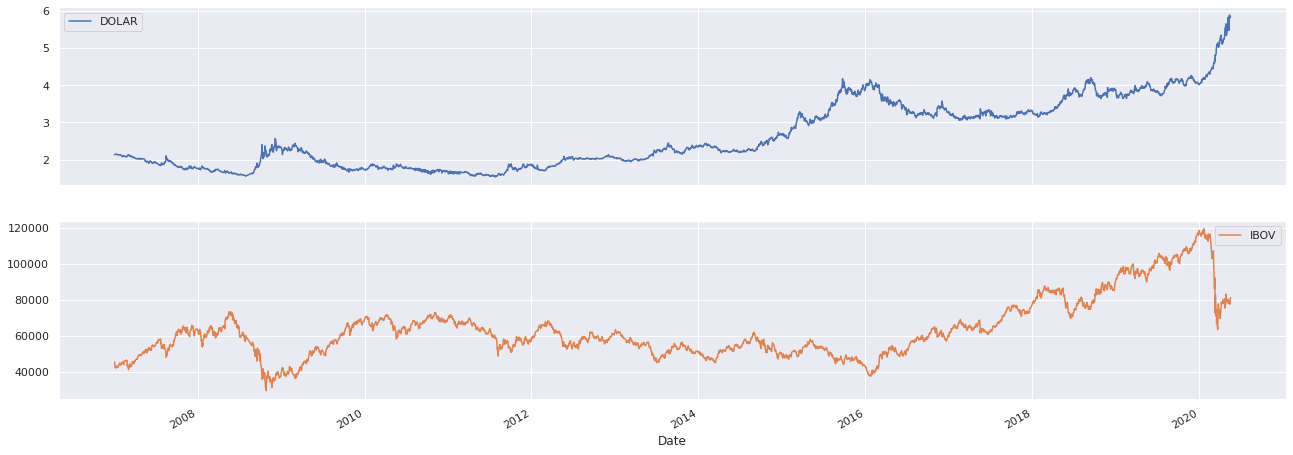

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [ ]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2020-05-12,0.062096,-0.015089
2020-05-13,0.011638,-0.001284
2020-05-14,0.000272,0.015931


In [ ]:
retornos.describe()

,DOLAR,IBOV
count,3272.000000,3272.000000
mean,0.000383,0.000346
std,0.012196,0.018318
min,-0.104792,-0.147797
25%,-0.005766,-0.008489
50%,0.000117,0.000661
75%,0.006297,0.009606
max,0.101524,0.146560


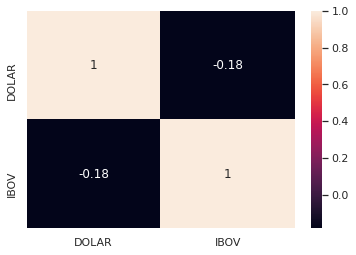

In [ ]:
sns.heatmap(retornos.corr(), annot=True);

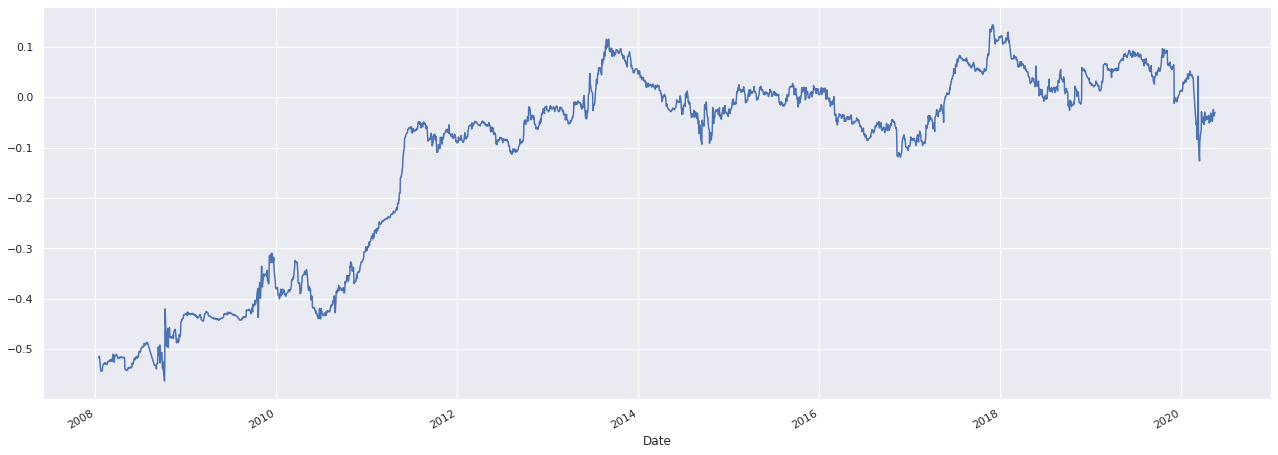

In [ ]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

In [ ]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

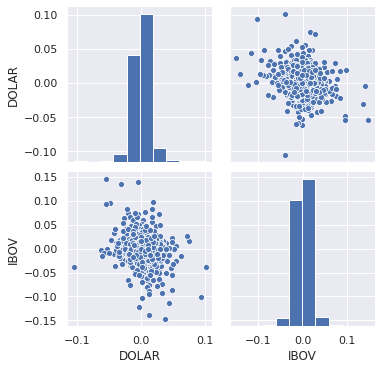

In [ ]:
sns.pairplot(retornos);